# Benchmarks for QM9

## Background

## Benchmarking


**The goal** of this benchmark is to 

## Description of readout 
- **Readouts**: 
- **Bioassay readout**: 
- **Optimization objective**: 

## Data resource: 
- **Reference**: 


## Train/test split



In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

# polaris benchmark
from polaris.benchmark import MultiTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[2]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [2]:
# Get the owner and organization
org = "Graphium"
data_name = "qm9"
dataset_name = f"{data_name}-v1"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

owner = HubOwner(slug=org.lower(), type="organization")
owner

HubOwner(slug='graphium', external_id=None, type='organization')

In [3]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"

FIGURE_DIR = f"{gcp_root}/figures"

### Load existing data

In [4]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = Dataset.from_json(DATASET_JSON)

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [5]:
data_cols = [
    "A",
    "B",
    "C",
    "mu",
    "alpha",
    "homo",
    "lumo",
    "gap",
    "r2",
    "zpve",
    "u0",
    "u298",
    "h298",
    "g298",
    "cv",
    "u0_atom",
    "u298_atom",
    "h298_atom",
    "g298_atom",
]
mol_col = "smiles"

### Get the train/test splits

In [9]:
import torch

split_path = f"{gcp_root}/data/raw/qm9_random_splits.pt"
with dm.fs.fsspec.open(split_path) as f:
    split_dict = torch.load(f)

splits = [split_dict["train"], split_dict["val"], split_dict["test"]]

### Check distribution of train/test set in the chemical space

  0%|          | 0/133885 [00:00<?, ?it/s]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


'https://storage.googleapis.com/polaris-public/polaris-recipes/org-Graphium/qm9/figures/chemspace.png'

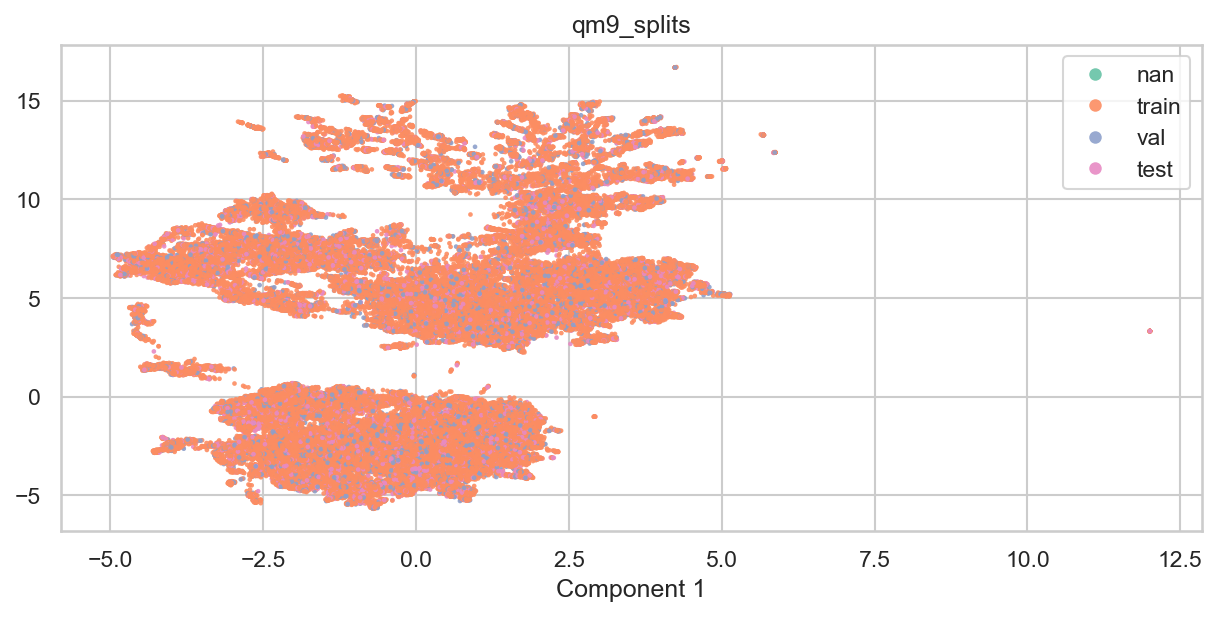

In [7]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(
    mols=dataset.table[mol_col].to_list(),
    train_test_dict={"qm9_splits": splits},
)

# export the figure to remote path
from utils.auroris_utils import save_image

save_image(fig, dm.fs.join(FIGURE_DIR, f"chemspace.png"))

## Define multitask benchmarks with the above defined split

In [10]:
benchmark_splits = (splits[0] + splits[1], splits[2])

In [11]:
benchmark_version = "v1"
benchmark_name = f"{data_name}-{benchmark_version}"
readme_name = f"org-Graphium/{data_name}/{data_name}_benchmark_readme.md"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"


benchmark = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "regression" for col in data_cols},
    input_cols=mol_col,
    split=benchmark_splits,
    metrics=["mean_squared_error"],
    tags=["multitask"],
    description="A multitask regression benchmark for QM9 dataset",
    owner=owner,
    readme=load_readme(readme_name),
)
path = benchmark.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-07-16 23:34:06.885 | INFO     | polaris._mixins:md5sum:27 - Computing the checksum. This can be slow for large datasets.
2024-07-16 23:34:07.016 | INFO     | polaris._mixins:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-Graphium/qm9/benchmarks/qm9-v1/benchmark.json


In [12]:
# Upload to hub
benchmark.upload_to_hub(owner=owner, access="private")

2024-07-16 23:36:03.298 | SUCCESS  | polaris.hub.client:upload_benchmark:675 - Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/graphium/qm9-v1


{'id': '09BcEk9MG0PsLMgccnAoW',
 'createdAt': '2024-07-17T03:36:01.217Z',
 'deletedAt': None,
 'name': 'qm9-v1',
 'slug': 'qm9-v1',
 'description': 'A multitask regression benchmark for QM9 dataset',
 'tags': ['multitask'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': 'dev',
 'readme': '## Background\n\n\n## Assay information\n\n\n## Description of readout:\n\n\n## Data resource\n\n',
 'state': 'ready',
 'ownerId': 'zMTB7lQiiukqEmLQF7EjT',
 'creatorId': 'NKnaHGybLqwSHcaMEHqfF',
 'datasetId': 'JxyFtl6Ejk7EaS2b6CriF',
 'targetCols': ['A',
  'B',
  'C',
  'mu',
  'alpha',
  'homo',
  'lumo',
  'gap',
  'r2',
  'zpve',
  'u0',
  'u298',
  'h298',
  'g298',
  'cv',
  'u0_atom',
  'u298_atom',
  'h298_atom',
  'g298_atom'],
 'inputCols': ['smiles'],
 'md5Sum': '07816484285cf9a23d0cf24db7082e4c',
 'metrics': ['mean_squared_error'],
 'mainMetric': 'mean_squared_error',
 'split': [[96754,
   13640,
   68811,
   29949,
   84973,
   56932,
   116250,
   8